## Simulation of the Higgs' boson detection experiment

See: http://www.sciencedirect.com/science/article/pii/S037026931200857X

Physics Letters B
      Volume 716, Issue 1, 17 September 2012, Pages 1-29

The following code produces a distribution of events that 
__qualitatively__ reproduces the values in Figure 4 of the above
paper. It is not base on any actual physics but can be used
for the purposes of this course to emulate the kind of distribution
resulting from the experiment


In 1 years of collected data:


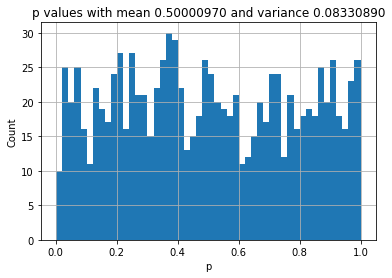

Chance that the p-value is under 5-sigmas is: 0.0 %



In [111]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pyplot as plt
import numpy as np

# Higgs' boson mass in GeV 
mH= 126.5

#Total number of events generated and ratios background/signal
years=1
Ntot = 80000*years
Nbg = int(Ntot*0.9995)
Ns = int(Ntot*0.0005)
Nsamples= 1000 #number of diferent experiments to compute each p value

# Max and min GeV of the sample
min= 100
max= 160

# Bins for plot
SizeBins=2
Nbins=int((max-min)/SizeBins)+1
bins= np.linspace(min,max,Nbins)

# Rate
tau= 0.0218

# Distributions i'll use
bg_dist= scp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau) #Distribucion
sig_dist= scp.norm(loc=mH,scale=2)
   

#GENERATE DATA AND COMPILE P VALUES
p_values= []
for i in range(Nsamples):

    # Generating background (truncated exponential)
    bg_points= bg_dist.rvs(Nbg)

    # Generating signal (gaussian) around mH. We take a sigma of 2.
    sig_points= sig_dist.rvs(Ns)

    # Join background and signal in a single sample
    all_points= np.concatenate( (bg_points,sig_points) )

    # Histogram of global sample
    # Note: the binning here is the one used in Figure 4
    hh= np.histogram(all_points,bins)

    
    #GENERATE THE COMPARISON NULL HYPOTHESIS (exponential)
    p_bins= [ Ntot*(bg_dist.pdf(bins[i])+bg_dist.pdf(bins[i+1]))*SizeBins/2 for i in range(len(bins)-1)]
    #p_bins= [ Ntot*(bg_dist.cdf(bins[i+1])-bg_dist.cdf(bins[i])) for i in range(len(bins)-1)] 
    
    
    # Run test
    c2_stat, p_val = scp.chisquare(hh[0],p_bins)

    p_values.append(p_val)

#Histogram of p values
h = plt.hist(p_values,50) 
#Computing expected p value
counter=0
p_mean= np.mean(p_values)
p_var=np.var(p_values)
for i in range(Nsamples):
    if p_values[i] < 2.9e-7:
        counter+=1

#PLOT
print('')         
print('In' , years, 'years of collected data:')

plt.grid(True)
plt.xlabel('p')
plt.ylabel('Count')
plt.title("p values with mean {:.8f} and variance {:.8f}".format(p_mean,p_var))
plt.show()

print('Chance that the p-value is under 5-sigmas is:',counter/Nsamples*100,'%')
print('')
